In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the data
businness = pd.read_json('datasets/yelp_academic_dataset_business.json', lines=True)

In [4]:
#see the first 5 rows of the dataset
businness.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [65]:
#see info
businness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [77]:
#show dtypes
businness.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [78]:
#show columns
businness.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [66]:
#count null values
businness.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [67]:
#city value counts: top 5
city_valuecounts = businness.city.value_counts()[0:5]
city_valuecounts

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
Name: count, dtype: int64

<Axes: xlabel='city', ylabel='count'>

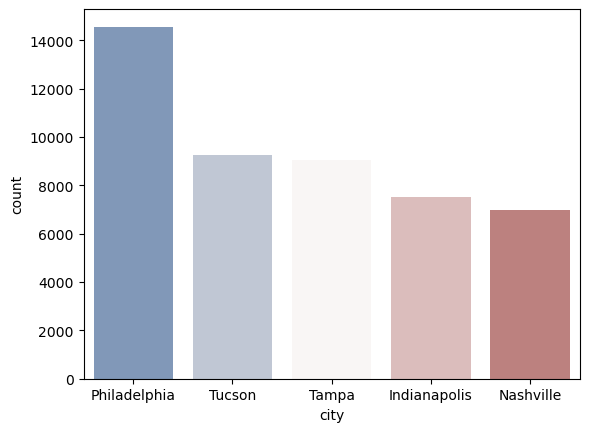

In [68]:
#plot value counts
sns.barplot(x = city_valuecounts.index, y = city_valuecounts, palette='vlag')

In [69]:
#top 10 businesses: according to the star ratings
top_10 =  businness.sort_values('stars', ascending = False).head(10)
top_10

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
60693,aASoTrOuCUd0sw2JcA9KcA,Beautiful Brides Philly,1613 E Passyunk Ave,Philadelphia,PA,19148,39.929527,-75.163651,5.0,41,1,"{'RestaurantsPriceRange2': '2', 'GoodForKids':...","Hair Salons, Beauty & Spas, Makeup Artists","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
60680,Z_l5dmN5AvLDS0KtVEjZZA,Dogs-N-Donuts,7743 E Broadway Blvd,Tucson,AZ,85710,32.222485,-110.825913,5.0,33,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Food, Pet Services, Cafes, Coffee & Tea, Donut...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."
60668,kkDAHR0rBwo_KGaPRxHqiw,Eye Deals,113 W Main St,Moorestown,NJ,08057,39.963104,-74.948789,5.0,12,1,"{'BikeParking': 'False', 'ByAppointmentOnly': ...","Health & Medical, Optometrists, Shopping, Eyew...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
60664,0y0qPSILVuwmj-hxkJJ0Bg,EverybodyFights,1900 Market St,Philadelphia,PA,19103,39.953260,-75.172695,5.0,22,0,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Fitness & Instruction, Gyms, Boxing, Active Life","{'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'..."
60661,zovnQ8uG7-hx9_t5lMe8sQ,Christopher Charles Fine Jewelry,148 Haddon Ave,Haddon Township,NJ,08108,39.910127,-75.049263,5.0,8,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Jewelry, Flowers & Gifts, Shopping","{'Tuesday': '11:0-17:0', 'Wednesday': '11:0-17..."
60655,tMu7rl3TO8MoATdyD6cZ2A,Red Kite Bicycle Studio,3201 Belmont Blvd,Nashville,TN,37212,36.116877,-86.798298,5.0,11,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Bike Repair/Maintenance, Shopping, Bikes, Loca...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
60646,Yn9zJfQ6ejsj6UFcLBdVXA,Studio N,"1040 N American St, Unit 1101",Philadelphia,PA,19123,39.967402,-75.141153,5.0,8,1,"{'WiFi': 'u'free'', 'AcceptsInsurance': 'False...","Beauty & Spas, Health & Medical, Medical Spas","{'Tuesday': '9:0-19:0', 'Wednesday': '9:0-17:0..."
60615,yKdBTZEoJssmojLNmPrjig,Sea Change Brewing,5302 50 Street,Beaumont,AB,T4X 1E5,53.356086,-113.416612,5.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Pubs, Breweries, Bars, Nightlife","{'Tuesday': '12:0-22:0', 'Wednesday': '12:0-22..."
60596,iH-NQNEuEbLCWX1xlBvTng,Salon Basia Hair Salon,1500 S Big Bend Blvd,Saint Louis,MO,63117,38.625688,-90.320114,5.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Beauty & Spas, Hair Salons","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."


In [70]:
#bottom 10 businesses: according to star ratings
bottom_10 = businness.sort_values('stars', ascending = True).head(10)
bottom_10

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
134378,JVPgCc8DPoBquc8_GsCizg,ENT & Allergy,"1941 Limestone Rd, Ste 210",Wilmington,DE,19808,39.720150,-75.652882,1.0,6,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Ear Nose & Throat, Health & Medical, Doctors",None
133383,7oqr1fVKRNrV1jHPQV1NnQ,Harbourside Resort,399 2nd St,Indian Rocks Beach,FL,33785,27.881666,-82.848725,1.0,10,1,None,"Resorts, Swimming Pools, Active Life, Hotels &...",None
98006,4U8yH6ieqSEqN29lOzXeVw,Penn State Industries,1425 Carlton St,Philadelphia,PA,19102,39.959392,-75.163052,1.0,6,1,{'BusinessAcceptsCreditCards': 'True'},"Colleges & Universities, Cards & Stationery, E...",None
94513,wwcljl_1iVzAip9gspulPw,Florida Shed & Fence,"6425 Ulmerton Rd, Unit A1",Largo,FL,33771,27.893939,-82.724957,1.0,5,1,None,"Contractors, Home Services, Fences & Gates","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
101032,69T7PE0VrxhjXZDoeR2mdQ,Ashley Psychic Readings,,Tampa,FL,33603,27.981616,-82.459028,1.0,5,1,"{'GoodForKids': 'False', 'BusinessAcceptsCredi...","Supernatural Readings, Psychics, Arts & Entert...",None
83751,0FgvYpOoxOIIuJd6eFf_kA,J.P Mascaro & Son's,,Bridgeport,PA,19405,40.104884,-75.338303,1.0,5,1,None,"Utilities, Local Services, Recycling Center, H...",None
52351,CtUUI1uIfsaJ4CzGfArzgw,Thrifty Car Rental,1 Terminal Dr,NASHVILLE AP,TN,37217,36.133613,-86.667282,1.0,7,1,None,"Car Rental, Hotels & Travel","{'Monday': '6:0-0:0', 'Tuesday': '6:0-0:0', 'W..."
128042,qVeRyVCmhUKx36PcY7IEkw,Parc Fontaine Apartments,"3101 Rue Parc Fontaine, Ste 19",New Orleans,LA,70131,29.922044,-90.010186,1.0,7,1,{'BusinessAcceptsCreditCards': 'True'},"Real Estate, Home Services, Apartments","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
40057,7j-s7IsivJLszx0s0w_QNw,Montego Grill,5222 Walnut St,Philadelphia,PA,19139,39.956840,-75.226335,1.0,5,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Restaurants, Bars, Trinidadian, Nightlife, Car...","{'Tuesday': '11:0-2:0', 'Wednesday': '11:0-2:0..."
94529,mNB7N7gEf33h9BGWegBHvw,KFC,3344 N. Oracle Road,Tucson,AZ,85705,32.267400,-110.978000,1.0,16,0,"{'RestaurantsDelivery': 'False', 'RestaurantsG...","Fast Food, Chicken Wings, Chicken Shop, Restau...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."


In [71]:
#average star rating per city
avg_stars_city = businness.groupby('city', as_index=False, sort=False).agg({'stars': ['mean']}).round(2)
avg_stars_city

,city,stars
,,mean
0,Santa Barbara,4.05
1,Affton,3.49
2,Tucson,3.59
3,Philadelphia,3.62
4,Green Lane,4.05
...,...,...
1411,"Mount Holly,",3.50
1412,Slidell,4.00
1413,Wales,3.00


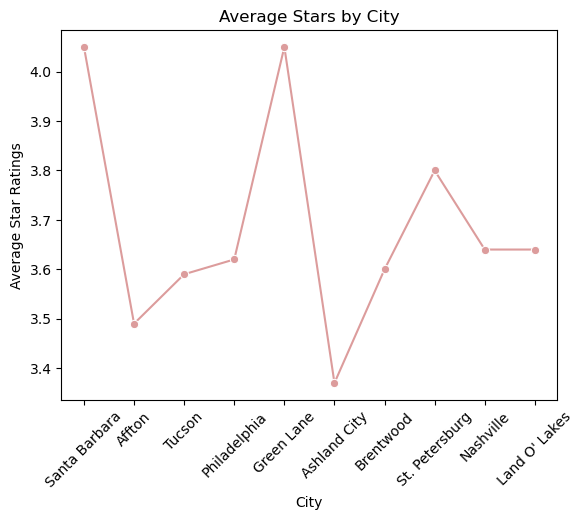

In [72]:
#let's plot these average results

#choose 10 cities for plotting purposes
avg_stars_city_limit10 = avg_stars_city.head(10)

sns.lineplot(x='city', y=('stars', 'mean'), data=avg_stars_city_limit10, marker='o', color='#dc9c9c')

#add labels and title 
plt.xlabel('City')
plt.ylabel('Average Star Ratings')
plt.title('Average Stars by City')

#rotate x-axis labels
plt.xticks(rotation=45)

#show plot
plt.show()


In [73]:
#average overall star rating: 3.6
avg_stars = businness.agg({'stars': ['mean']}).round(2)
avg_stars

,stars
mean,3.6
